<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [3]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A=np.array([[0,1],[1,1]])
b=np.array([1,0])

In [4]:
# beta = A^-1 * b
A_inv = np.linalg.inv(A)

In [5]:
beta = A_inv.dot(b)
beta

array([-1.,  1.])

In [6]:
beta[0]


-1.0

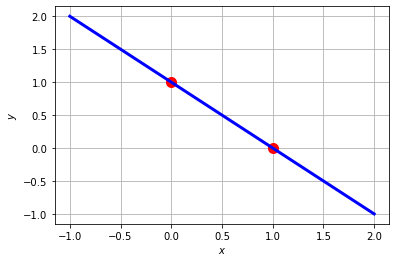

In [7]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(0,1,'ro', ms=10, label='$(0,1)$')
plt.plot(1,0,'ro', ms=10, label='$(1,0)$')
x_num=np.linspace(-1,2)

y_num = beta[0]*x_num + beta[1]

plt.plot(x_num, y_num, 'b', lw=3, label=f'$y=-x+1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [8]:
# Encontrar beta_0, beta_1 y beta_2
A=np.array([[1,-1,1],[1,0,0],[1,1,1]])
b=np.array([1,0,1])


In [9]:
beta = np.linalg.solve(A, b)
beta

array([0., 0., 1.])

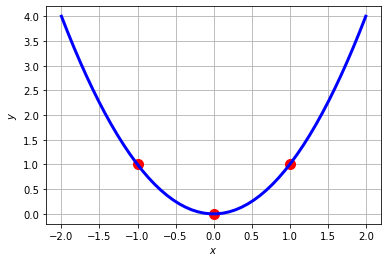

In [10]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(-1,1,'ro', ms=10, label='$(-1,1)$')
plt.plot(0,0,'ro', ms=10, label='$(0,0)$')
plt.plot(1,1,'ro', ms=10, label='$(1,1)$')
x_num=np.linspace(-2,2)

y_num = beta[2]*x_num**2 + beta[1]*x_num + beta[0]

plt.plot(x_num, y_num, 'b', lw=3, 
         label=f'$y=${beta[2]}$x^2$ + {beta[1]}$x$ + {beta[0]}')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [11]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 +2*x + np.random.normal(loc=0, scale=2, size=(N,))

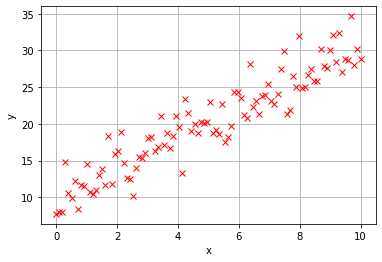

In [12]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [13]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [14]:
# Función minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [15]:
# Definir funcion objetivo y punto inicial
def min_sq(beta, x_points, y_points):
    n = len(x_points)
    recta = beta[0] + beta[1]*x_points
    return (1/(2*n)) * ((y_points - recta)**2).sum()

In [16]:
beta=[0,0]

In [17]:
solucion = opt.minimize(fun=min_sq, x0=beta, args=(x,y))

In [18]:
# Mostrar sol
solucion

      fun: 2.639567496650228
 hess_inv: array([[ 3.93631359, -0.58578919],
       [-0.58578919,  0.1164538 ]])
      jac: array([-2.08616257e-07, -2.08616257e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([9.86844248, 2.07426537])

In [19]:
solucion.x

array([9.86844248, 2.07426537])

¿Qué tan bien luce el ajuste?

In [20]:
# Coeficientes \beta_0 y \beta_1
beta = solucion.x
beta

array([9.86844248, 2.07426537])

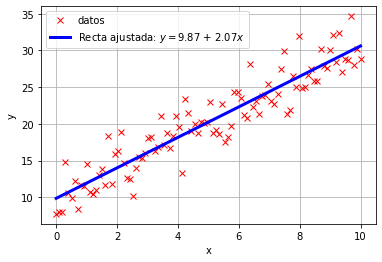

In [21]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
y_fit = beta[0] + beta[1]*x
plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

In [22]:
min_sq(beta, x, y)

2.639567496650228

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [23]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x = np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3, size=(N,))


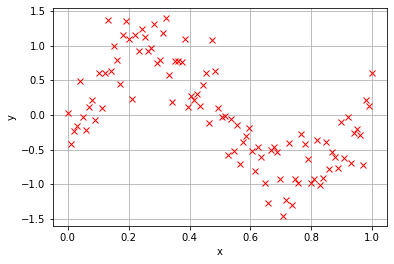

In [24]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [25]:
# Definir funcion objetivo y punto inicial
def min_sq_1(beta, x_points, y_points):
    n = len(x_points)
    # Modelo lineal
    recta = beta[0] + beta[1]*x_points
    return (1/(2*n)) * ((y_points - recta)**2).sum()

In [26]:
beta_ini = [0,0]

In [27]:
solucion_1 = opt.minimize(fun=min_sq_1, x0=beta_ini, args=(x,y))
solucion_1

      fun: 0.16168450279976096
 hess_inv: array([[ 3.8554827 , -5.73199901],
       [-5.73199901, 11.50086596]])
      jac: array([ 2.40281224e-07, -1.76951289e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.77264037, -1.50704698])

In [28]:
beta_1=solucion_1.x
beta_1

array([ 0.77264037, -1.50704698])

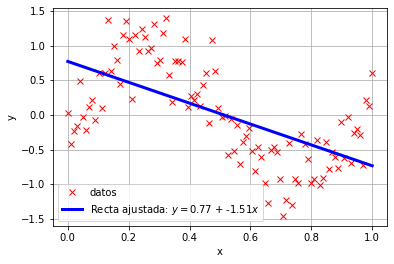

In [29]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
y_fit = beta_1[0] + beta_1[1]*x
plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [30]:
# Definir funcion objetivo y semilla
def min_sq_2(beta, x_points, y_points):
    n=len(x_points)
    parabola = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    return (1/(2*n))*((y_points - parabola)**2).sum()

beta_ini_2 = [0,0,0]

In [31]:
# Resolver
solucion_2 = opt.minimize(fun=min_sq_2, x0=beta_ini_2, args=(x,y))
solucion_2

      fun: 0.1611223982004802
 hess_inv: array([[   7.81571771,  -30.43552999,   25.22135026],
       [ -30.43552999,  163.94054199, -155.1971661 ],
       [  25.22135026, -155.1971661 ,  157.66575117]])
      jac: array([-9.57585871e-06, -9.73790884e-06, -6.12810254e-06])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 15
     njev: 17
   status: 0
  success: True
        x: array([ 0.69995824, -1.06645266, -0.44064904])

**Veamos $\beta$ para el ajuste con recta**

In [32]:
beta_2 = solucion_2.x
beta_2

array([ 0.69995824, -1.06645266, -0.44064904])

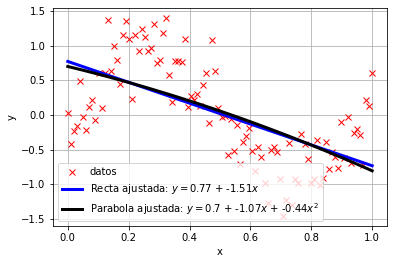

In [33]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
y_fit = beta_1[0] + beta_1[1]*x
y_fit2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2

#Modelo lineal
plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
# Modelo de una parábola
plt.plot(x, y_fit2, 'k', lw=3, label=f'Parabola ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')


plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()


### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [34]:
# Definir funcion objetivo y semilla


In [35]:
# Resolver


**Veamos $\beta$ para el ajuste con parábola**

In [36]:
# Mostrar coeficientes


In [37]:
# Graficar recta y parabola ajustadas


### 2.3. Tampoco. Quizá un polinomio cúbico...

In [38]:
# Definir funcion objetivo y semilla
def min_sq_3(beta, x_points, y_points):
    n=len(x_points)
    cubico = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    
    return (1/(2*n))*((y_points - cubico)**2).sum()

bete_ini_3 = [0,0,0,0]

In [39]:
solucion_3 = opt.minimize(fun=min_sq_3, x0=bete_ini_3, args=(x,y))
solucion_3

      fun: 0.05303350309615366
 hess_inv: array([[   14.42263866,  -109.20199914,   219.41814549,  -128.21969645],
       [ -109.20199914,  1117.47324239, -2531.67740276,  1578.29846966],
       [  219.41814549, -2531.67740276,  6106.24326414, -3958.78282163],
       [ -128.21969645,  1578.29846966, -3958.78282163,  2636.5850776 ]])
      jac: array([3.69176269e-06, 1.61025673e-06, 1.54599547e-06, 1.53528526e-06])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.4585872 ,  13.19523678, -36.27410525,  23.88879929])

**Veamos $\beta$ para el ajuste con cúbica**

In [40]:
# Mostrar coeficientes
beta_3 = solucion_3.x
beta_3

array([ -0.4585872 ,  13.19523678, -36.27410525,  23.88879929])

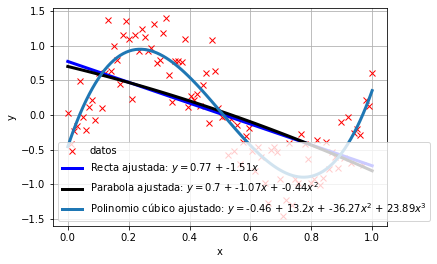

In [41]:
# Graficar recta, parabola y cubica
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
y_fit = beta_1[0] + beta_1[1]*x
y_fit2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
y_fit3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3

#Modelo lineal
plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
# Modelo de una parábola
plt.plot(x, y_fit2, 'k', lw=3, label=f'Parabola ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')
# Modelo cúbico
plt.plot(x, y_fit3, lw=3, label=f'Polinomio cúbico ajustado: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [42]:
# Definimos funcion objetivo y semilla
def min_sq_7(beta,x_points,y_points):
    n=len(x_points)
    poli_7 = np.array([beta[i]*x_points**i for i in range(8)]).sum(axis=0)
    return (1/(2*n))*((y_points - poli_7)**2).sum()

beta_ini_7 = np.zeros(8)

In [43]:
# Resolvemos
solucion_7 = opt.minimize(fun=min_sq_7, x0=beta_ini_7, args=(x,y))
solucion_7

      fun: 0.05179024448894702
 hess_inv: array([[   15.2938833 ,  -123.52587983,   224.73724234,    10.66811562,
         -127.32183191,  -119.79699362,   -14.85378326,   138.50920337],
       [ -123.52587983,  1382.27911778, -2919.95956742,     9.37786173,
         1806.15989206,  1625.10406811,   140.17486704, -1983.268415  ],
       [  224.73724234, -2919.95956742,  6762.81861088,  -286.98384002,
        -4461.85665355, -3885.8240766 ,  -210.45114774,  4966.28710653],
       [   10.66811562,     9.37786173,  -286.98384002,   148.89434395,
          332.76692517,   224.63442466,   -58.80517101,  -418.89955769],
       [ -127.32183191,  1806.15989206, -4461.85665355,   332.76692517,
         3096.76742236,  2627.25527866,    67.33106138, -3496.97332266],
       [ -119.79699362,  1625.10406811, -3885.8240766 ,   224.63442466,
         2627.25527866,  2260.88528898,    92.43271701, -2943.39211997],
       [  -14.85378326,   140.17486704,  -210.45114774,   -58.80517101,
           67.33

**De nuevo, veamos $\beta$**

In [44]:
# Mostrar coeficientes
beta_7=solucion_7.x
beta_7

array([ -0.41235577,  11.39588211, -23.61764115,  -3.00990999,
        11.22201435,  11.82254461,   3.09975741, -10.37898234])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

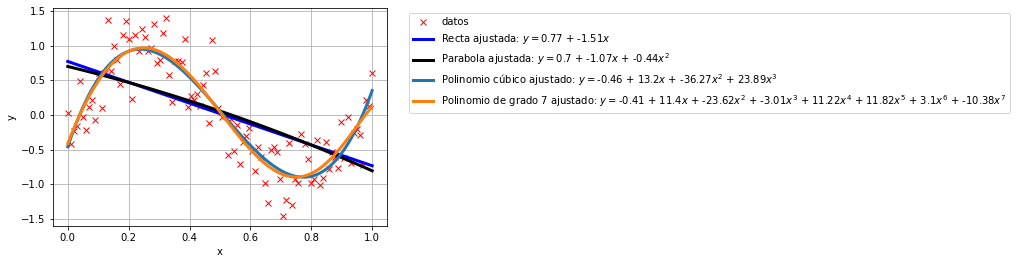

In [45]:
# Grafica de ajustes
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
y_fit = beta_1[0] + beta_1[1]*x
y_fit2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
y_fit3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
y_fit7 = beta_7[0] +  beta_7[1]*x + beta_7[2]*x**2 + beta_7[3]*x**3 + beta_7[4]*x**4 + beta_7[5]*x**5 + beta_7[6]*x**6 + beta_7[7]*x**7

#Modelo lineal
plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
# Modelo de una parábola
plt.plot(x, y_fit2, 'k', lw=3, label=f'Parabola ajustada: $y=${np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$ + {np.round(beta_2[2],2)}$x^2$')
# Modelo cúbico
plt.plot(x, y_fit3, lw=3, label=f'Polinomio cúbico ajustado: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')

# Modelo polinomial de grado 7
plt.plot(x, y_fit7, lw=3, label=f'Polinomio de grado 7 ajustado: $y=${np.round(beta_7[0],2)} + {np.round(beta_7[1],2)}$x$ + {np.round(beta_7[2],2)}$x^2$ + {np.round(beta_7[3],2)}$x^3$ + {np.round(beta_7[4],2)}$x^4$ + {np.round(beta_7[5],2)}$x^5$ + {np.round(beta_7[6],2)}$x^6$ + {np.round(beta_7[7],2)}$x^7$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [46]:
# Función objetivo ajuste polinomio grado N
def min_sq_N(beta, x_points, y_points, N):
    n=len(x_points)
    poli_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    return (1/(2*n))*((y_points - poli_N)**2).sum()

In [47]:
# Error cuadratico
error = []
for i in range(1,10):
    beta_ini=np.zeros(i+1)
    solucion = opt.minimize(fun=min_sq_N, x0=beta_ini, args=(x,y,i))
    error.append(solucion.fun)
    

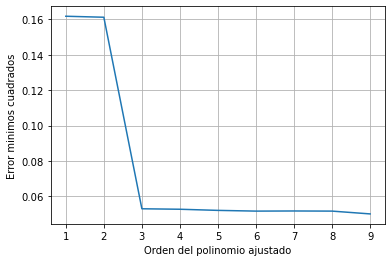

In [48]:
plt.figure(figsize=(6,4))
plt.plot(range(1,10), error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error minimos cuadrados')
plt.grid()

En efecto, parece que con $3$ es suficiente.

In [49]:
error

[0.16168450279976096,
 0.1611223982004802,
 0.05303350309615366,
 0.05276460584205812,
 0.05212495641456107,
 0.051715163300384226,
 0.05179024448894702,
 0.05171536350340716,
 0.050130880709140443]

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [50]:
def min_sq_N(beta, x_points, y_points, N, l):
    n = len(x_points)
    poli_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - poli_N)**2).sum() + l*np.linalg.norm(beta)**2

In [51]:
solucion = opt.minimize(fun=min_sq_N, x0=np.zeros(8), args=(x, y,7, 0.0003))


In [52]:
solucion

      fun: 0.09452642794777852
 hess_inv: array([[ 7.87635750e+00, -3.36078601e+01,  2.56339333e+01,
         1.50126006e+01, -2.69759260e-01, -7.23205226e+00,
        -6.76039907e+00, -1.70615484e+00],
       [-3.36078601e+01,  2.39327955e+02, -3.00335173e+02,
        -9.24770169e+01,  8.73638753e+01,  1.24210297e+02,
         5.52963881e+01, -7.12001802e+01],
       [ 2.56339333e+01, -3.00335173e+02,  6.10592918e+02,
         2.61450417e+01, -3.47216736e+02, -3.28292090e+02,
        -4.74418917e+01,  3.63481582e+02],
       [ 1.50126006e+01, -9.24770169e+01,  2.61450417e+01,
         9.62743396e+01,  8.46211051e+01,  2.74348531e+01,
        -4.88562156e+01, -1.28523697e+02],
       [-2.69759260e-01,  8.73638753e+01, -3.47216736e+02,
         8.46211051e+01,  3.03997006e+02,  2.30930012e+02,
        -2.24284885e+01, -3.59362003e+02],
       [-7.23205226e+00,  1.24210297e+02, -3.28292090e+02,
         2.74348531e+01,  2.30930012e+02,  1.96633985e+02,
         6.17080068e+00, -2.5718403

In [54]:
beta_7_ridge = solucion.x

In [55]:
solucion = opt.minimize(fun=min_sq_N, x0=np.zeros(4), args=(x, y,3, 0.0003))
beta_3_ridge = solucion.x

In [56]:
beta_3_ridge

array([ 0.61754661,  0.60941477, -5.61781522,  3.87507902])

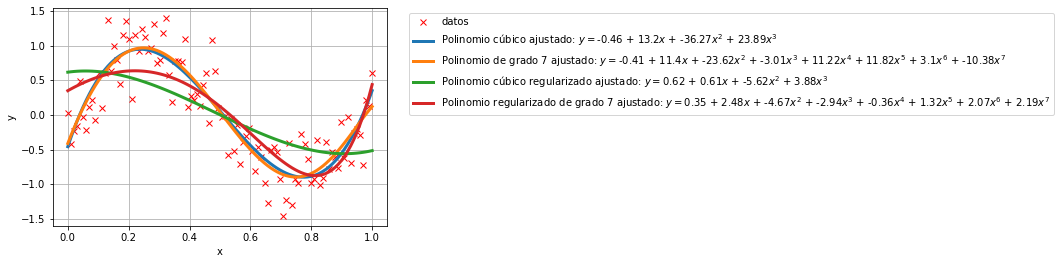

In [57]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')

# Modelos obtenidos sin regularización
y_fit3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
y_fit7 = beta_7[0] +  beta_7[1]*x + beta_7[2]*x**2 + beta_7[3]*x**3 + beta_7[4]*x**4 + beta_7[5]*x**5 + beta_7[6]*x**6 + beta_7[7]*x**7

# Modelos obtenidos con regularización
y_fit3_ridge = beta_3_ridge[0] + beta_3_ridge[1]*x + beta_3_ridge[2]*x**2 + beta_3_ridge[3]*x**3
y_fit7_ridge = beta_7_ridge[0] +  beta_7_ridge[1]*x + beta_7_ridge[2]*x**2 + beta_7_ridge[3]*x**3 + beta_7_ridge[4]*x**4 + beta_7_ridge[5]*x**5 + beta_7_ridge[6]*x**6 + beta_7_ridge[7]*x**7

# Plot de modelos sin regularización
# Modelo cúbico
plt.plot(x, y_fit3, lw=3, label=f'Polinomio cúbico ajustado: $y=${np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$ + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')
# Modelo polinomial de grado 7
plt.plot(x, y_fit7, lw=3, label=f'Polinomio de grado 7 ajustado: $y=${np.round(beta_7[0],2)} + {np.round(beta_7[1],2)}$x$ + {np.round(beta_7[2],2)}$x^2$ + {np.round(beta_7[3],2)}$x^3$ + {np.round(beta_7[4],2)}$x^4$ + {np.round(beta_7[5],2)}$x^5$ + {np.round(beta_7[6],2)}$x^6$ + {np.round(beta_7[7],2)}$x^7$')


# Plot de modelos con regularización
plt.plot(x, y_fit3_ridge, lw=3, label=f'Polinomio cúbico regularizado ajustado: $y=${np.round(beta_3_ridge[0],2)} + {np.round(beta_3_ridge[1],2)}$x$ + {np.round(beta_3_ridge[2],2)}$x^2$ + {np.round(beta_3_ridge[3],2)}$x^3$')
# Modelo polinomial de grado 7
plt.plot(x, y_fit7_ridge, lw=3, label=f'Polinomio regularizado de grado 7 ajustado: $y=${np.round(beta_7_ridge[0],2)} + {np.round(beta_7_ridge[1],2)}$x$ + {np.round(beta_7_ridge[2],2)}$x^2$ + {np.round(beta_7_ridge[3],2)}$x^3$ + {np.round(beta_7_ridge[4],2)}$x^4$ + {np.round(beta_7_ridge[5],2)}$x^5$ + {np.round(beta_7_ridge[6],2)}$x^6$ + {np.round(beta_7_ridge[7],2)}$x^7$')


plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [ ]:
def min_sq_N_lasso(beta, x_points, y_points, N, l):
    n = len(x_points)
    poli_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - poli_N)**2).sum() + l*

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

In [58]:
N=20
x=np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0, scale=2, size=(N,))
y[0] =30
y[-1] = 10

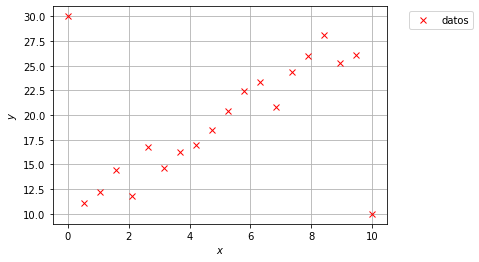

In [64]:
plt.figure(figsize=(6,4))
plt.plot(x,y, 'xr', label='datos')
#Modelo lineal

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
plt.grid()

Solucionamos el problema normalmente...

In [61]:
solucion = opt.minimize(fun = min_sq_1, x0=np.zeros(2), args=(x,y))
beta = solucion.x

In [62]:
beta

array([15.42188335,  0.81238144])

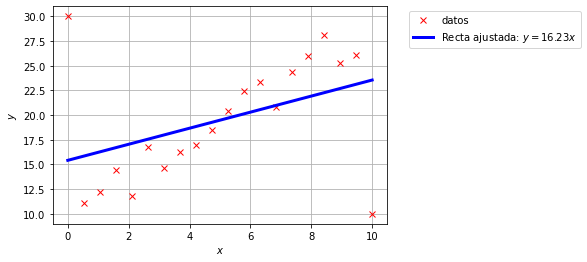

In [65]:
plt.figure(figsize=(6,4))
plt.plot(x,y, 'xr', label='datos')

y_fit = beta[0] + beta[1]*x
plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta[0],2) + np.round(beta[1],2)}$x$')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
plt.grid()

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

In [66]:
def huber(a,d):
    if np.abs(a)<= d:
        return a**2
    else: 
        return d*(2*abs(a) - d)


In [67]:
def min_sq_rob(beta, x_points, y_points):
    n=len(x_points)
    recta = beta[0] + beta[1]*x_points
    
    return (1/(2*n))*(np.vectorize(huber)(y_points - recta,5)).sum()


In [70]:
solucion = opt.minimize(fun=min_sq_rob, x0=np.zeros(2), args=(x,y))
solucion

      fun: 8.787973492569582
 hess_inv: array([[ 4.95410305, -0.76875634],
       [-0.76875634,  0.15378592]])
      jac: array([ 0.00000000e+00, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([11.98852235,  1.48758228])

In [71]:
beta_rob = solucion.x

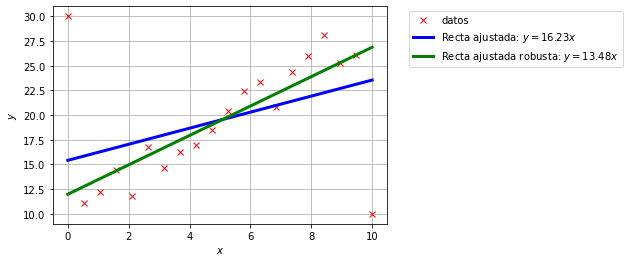

In [73]:
plt.figure(figsize=(6,4))
plt.plot(x,y, 'xr', label='datos')

y_fit = beta[0] + beta[1]*x
y_fit_rob = beta_rob[0] + beta_rob[1]*x

plt.plot(x, y_fit, 'b', lw=3, label=f'Recta ajustada: $y=${np.round(beta[0],2) + np.round(beta[1],2)}$x$')
plt.plot(x, y_fit_rob, 'g', lw=3, label=f'Recta ajustada robusta: $y=${np.round(beta_rob[0],2) + np.round(beta_rob[1],2)}$x$')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
plt.grid()

Mejor...

## 5. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?

Abrir un nuevo notebook, llamado `Tarea3_ApellidoNombre` y subirlo a canvas en el espacio habilitado.

In [74]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [79]:
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [76]:
x = data['size'].values
y = data['price'].values

In [77]:
x

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203])

In [78]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para este próximo jueves, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alncance.
### 4. Fecha de entrega y presentación: por definir